In [1]:
import pandas as pd
import os

In [2]:
df = pd.read_csv("./Sales_Data/Sales_April_2019.csv") 
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


# merge all files in sales data

In [3]:
directory_path = "./Sales_Data"
file_list = os.listdir(directory_path)
for file in file_list:
    print (file)


Sales_April_2019.csv
Sales_August_2019.csv
Sales_December_2019.csv
Sales_February_2019.csv
Sales_January_2019.csv
Sales_July_2019.csv
Sales_June_2019.csv
Sales_March_2019.csv
Sales_May_2019.csv
Sales_November_2019.csv
Sales_October_2019.csv
Sales_September_2019.csv


In [4]:
all_months_data = pd.DataFrame()
for file in file_list:
    df = pd.read_csv("./Sales_Data/"+file)
    all_months_data = pd.concat([all_months_data,df])
    
all_months_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


#converting all data to csv....................... 

In [5]:
all_months_data.to_csv("all_data.csv",index = False )

In [6]:
all_data = pd.read_csv("all_data.csv")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [7]:
all_data = all_data[all_data['Order Date'].str[0:2]!= 'Or'] #REMOVED 'Or' in Month column

In [8]:
all_data['Month'] = all_data['Order Date'].str[0:2].fillna(0) #Replaced NAN values by 0 
all_data['Month'] = all_data['Month'].astype('int32')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
1,NaN,NaN,NaN,NaN,NaN,NaN,0
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4


# add a sales column

In [9]:
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'])
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'])

In [10]:
all_data['Sales'] = all_data['Quantity Ordered'] * all_data['Price Each']
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2.0,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
1,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
2,176559,Bose SoundSport Headphones,1.0,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1.0,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1.0,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99


In [11]:
all_data = all_data.dropna(axis =0 ,how ='any')

In [12]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2.0,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1.0,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1.0,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1.0,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1.0,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


# Which was the best month for sale ? How much earned that month?

In [13]:
result = all_data.groupby('Month').sum()

C:\Users\HP\AppData\Local\Temp\ipykernel_9892\248489978.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  result = all_data.groupby('Month').sum()


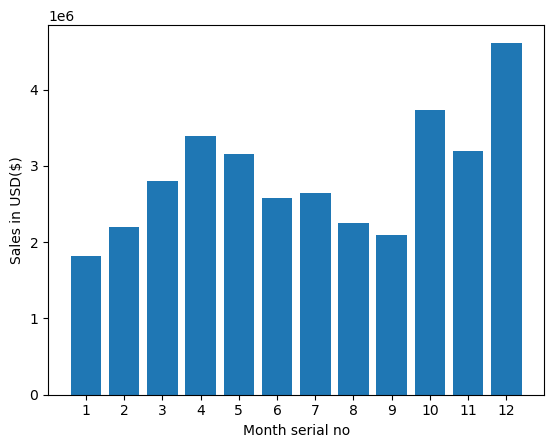

In [14]:
import matplotlib.pyplot as plt 
months = range(1,13)
plt.bar(months,result['Sales'])
plt.xticks(months)
plt.ylabel('Sales in USD($)')
plt.xlabel('Month serial no')
plt.show()

# city columns

In [15]:
#LETS USE .apply() function
def get_city(address):
    return address.split(',')[1]
def get_state(address):
    return address.split(',')[2].split(' ')[1]


all_data['City'] = all_data['Purchase Address'].apply(lambda x: f"{get_city(x)} ({get_state(x)})") #f-string
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2.0,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX)
2,176559,Bose SoundSport Headphones,1.0,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA)
3,176560,Google Phone,1.0,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA)
4,176560,Wired Headphones,1.0,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)
5,176561,Wired Headphones,1.0,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)


# which city has the highest no of sells ?

In [16]:
results = all_data.groupby('City').sum()
results

C:\Users\HP\AppData\Local\Temp\ipykernel_9892\2386508471.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  results = all_data.groupby('City').sum()


,Quantity Ordered,Price Each,Month,Sales
City,,,,
Atlanta (GA),16602.0,2779908.20,104794,2795498.58
Austin (TX),11153.0,1809873.61,69829,1819581.75
Boston (MA),22528.0,3637409.77,141112,3661642.01
Dallas (TX),16730.0,2752627.82,104620,2767975.40
Los Angeles (CA),33289.0,5421435.23,208325,5452570.80
New York City (NY),27932.0,4635370.83,175741,4664317.43
Portland (ME),2750.0,447189.25,17144,449758.27
Portland (OR),11303.0,1860558.22,70621,1870732.34
San Francisco (CA),50239.0,8211461.74,315520,8262203.91


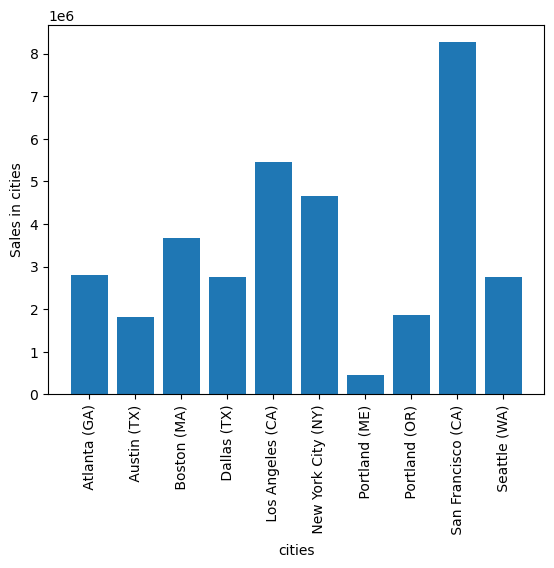

In [17]:
import matplotlib.pyplot as plt

cities = [city for city, df in all_data.groupby('City')]

plt.bar(cities,results['Sales'])
plt.xticks(cities,rotation='vertical',size=10)
plt.xlabel('cities')
plt.ylabel('Sales in cities')
plt.show()

### At what time should we play more ads to maximize the likelihood to customer buying product ?

In [18]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2.0,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX)
2,176559,Bose SoundSport Headphones,1.0,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA)
3,176560,Google Phone,1.0,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA)
4,176560,Wired Headphones,1.0,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)
5,176561,Wired Headphones,1.0,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)


In [19]:
all_data['Order Date']= pd.to_datetime(all_data['Order Date'])

In [20]:
all_data['Hour']= all_data['Order Date'].dt.hour
all_data['Minutes']= all_data['Order Date'].dt.minute
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minutes
0,176558,USB-C Charging Cable,2.0,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),8,46
2,176559,Bose SoundSport Headphones,1.0,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),22,30
3,176560,Google Phone,1.0,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14,38
4,176560,Wired Headphones,1.0,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14,38
5,176561,Wired Headphones,1.0,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),9,27


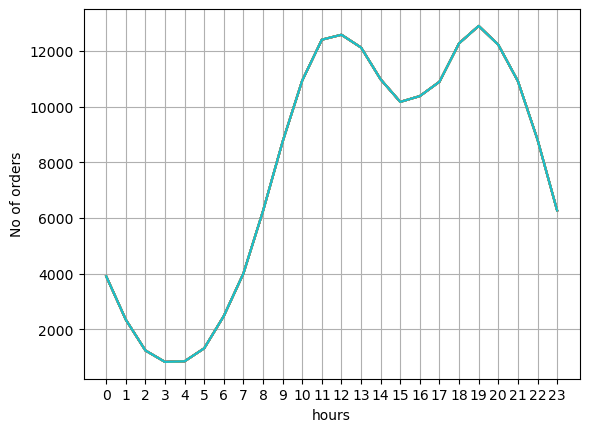

In [21]:
hours = [hour for hour, df in all_data.groupby('Hour')]
plt.plot(hours,all_data.groupby(['Hour']).count())
plt.xticks(hours)
plt.xlabel('hours')
plt.ylabel('No of orders')
plt.grid()
plt.show()
# 11:00..17:00 and 18:00 are great time for advertisement

## Which products are bought together ?

In [22]:
df = pd.DataFrame(all_data[all_data['Order ID'].duplicated(keep=False)])
df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
df = df[['Order ID','Grouped']].drop_duplicates()
df.head()


,Order ID,Grouped
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"


In [23]:
from itertools import combinations
from collections import Counter

count = Counter()

for row in df['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list,2)))
    
#print(count)
for key, value in count.most_common(10):
    print(key,value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


# which order sold the most? Why do you think it sold the most ?

In [ ]:
all_data.head()

In [25]:
product_group = all_data.groupby('Product')
product_group.sum()

C:\Users\HP\AppData\Local\Temp\ipykernel_9892\2905097574.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  product_group.sum()


,Quantity Ordered,Price Each,Month,Sales,Hour,Minutes
Product,,,,,,
20in Monitor,4129.0,451068.99,29336,454148.71,58764,122252
27in 4K Gaming Monitor,6244.0,2429637.70,44440,2435097.56,90916,184331
27in FHD Monitor,7550.0,1125974.93,52558,1132424.50,107540,219948
34in Ultrawide Monitor,6199.0,2348718.19,43304,2355558.01,89076,183480
AA Batteries (4-pack),27635.0,79015.68,145558,106118.40,298342,609039
AAA Batteries (4-pack),31017.0,61716.59,146370,92740.83,297332,612113
Apple Airpods Headphones,15661.0,2332350.00,109477,2349150.00,223304,455570
Bose SoundSport Headphones,13457.0,1332366.75,94113,1345565.43,192445,392603
Flatscreen TV,4819.0,1440000.00,34224,1445700.00,68815,142789


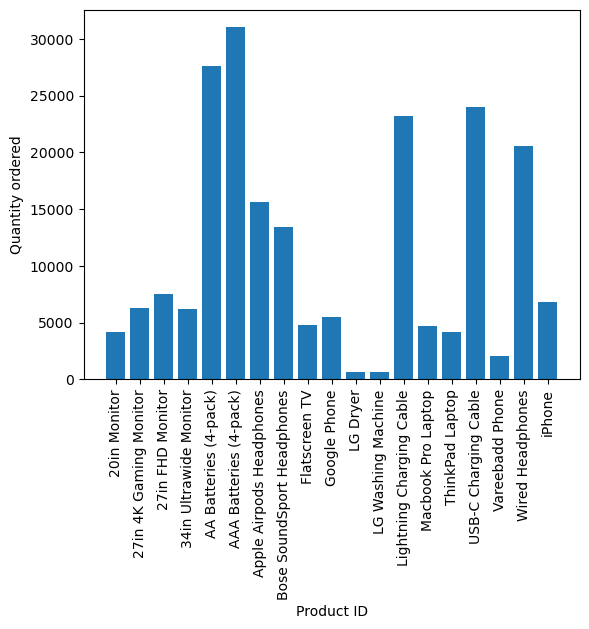

In [26]:
quantity_ordered = product_group['Quantity Ordered'].sum()
products = [product for product,df in product_group]
plt.bar(products,quantity_ordered)
plt.xticks(products,rotation='vertical',size=10)
plt.ylabel('Quantity ordered')
plt.xlabel('Product ID')
plt.show()

In [33]:
prices = all_data.groupby('Product').mean('Price Each')
print(prices)

                            Quantity Ordered  Price Each     Month  \
Product                                                              
20in Monitor                        1.006828      109.99  7.153377   
27in 4K Gaming Monitor              1.002247      389.99  7.133226   
27in FHD Monitor                    1.005728      149.99  7.001199   
34in Ultrawide Monitor              1.002912      379.99  7.005986   
AA Batteries (4-pack)               1.343004        3.84  7.073820   
AAA Batteries (4-pack)              1.502689        2.99  7.091226   
Apple Airpods Headphones            1.007203      150.00  7.040774   
Bose SoundSport Headphones          1.009906       99.99  7.062889   
Flatscreen TV                       1.003958      300.00  7.130000   
Google Phone                        1.001267      600.00  6.933032   
LG Dryer                            1.000000      600.00  6.784830   
LG Washing Machine                  1.000000      600.00  6.791291   
Lightning Charging C

C:\Users\HP\AppData\Local\Temp\ipykernel_9892\2604058926.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(products, rotation='vertical', size=8)
C:\Users\HP\AppData\Local\Temp\ipykernel_9892\2604058926.py:12: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


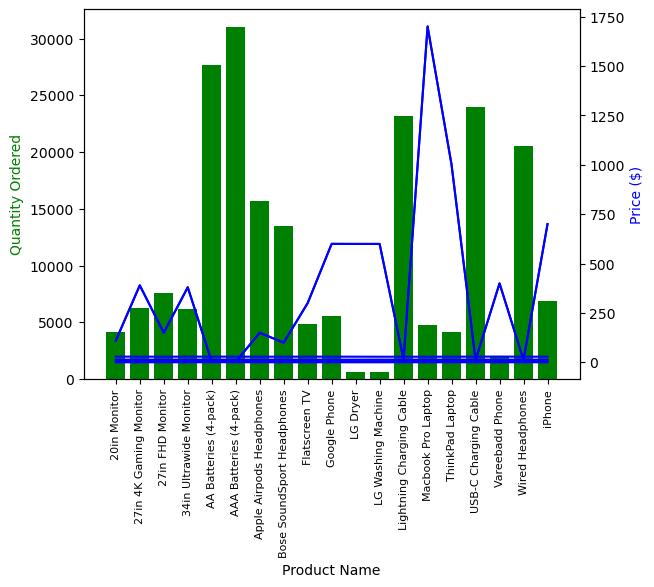

In [36]:
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(products, quantity_ordered, color='g')
ax2.plot(products, prices, color='b')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Price ($)', color='b')
ax1.set_xticklabels(products, rotation='vertical', size=8)

fig.show()